In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

In [2]:
data_1 = TabularDataset('Dataset_AutoML.csv').drop(['Sequence'],axis=1)
#data=data.drop(['Anti_Sa'], axis=1)
data_1.head()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,15,0.333,0.333,0.333,0.180164,0.267333,0.46,0.81,4,11.85,...,33.333,40.000,20.000,20.000,53.333,46.667,33.333,33.333,0.000,2
1,16,0.688,0.188,0.562,0.526107,0.426250,1.28,-0.34,5,11.28,...,31.250,37.500,56.250,6.250,62.500,37.500,31.250,31.250,0.000,1
2,13,0.538,0.231,0.615,0.846486,0.315385,2.61,0.44,4,11.87,...,0.000,15.385,30.769,15.385,46.154,53.846,46.154,38.462,7.692,2
3,12,0.500,0.083,0.333,0.782014,0.192500,2.61,0.71,4,11.87,...,0.000,16.667,33.333,8.333,41.667,58.333,50.000,41.667,8.333,2
4,17,0.529,0.176,0.294,0.771108,0.377647,2.36,0.09,4,11.88,...,5.882,29.412,35.294,11.765,52.941,47.059,35.294,29.412,5.882,2


# BorderlineSMOTE

In [3]:
Feature=pd.DataFrame(data_1.drop(['Label'], axis=1))
Lab=data_1['Label']
Lab=pd.DataFrame(Lab)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
smo = BorderlineSMOTE(random_state=42)
x_smo, y_smo = smo.fit_resample(Feature,Lab)
x_smo=pd.DataFrame(x_smo)
smo=pd.merge(x_smo,y_smo,left_index=True, right_index=True)
smo

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,15,0.333000,0.333000,0.333000,0.180164,0.267333,0.460000,0.810000,4,11.850000,...,33.333000,40.000000,20.000000,20.000000,53.333000,46.667000,33.333000,33.333000,0.000000,2
1,16,0.688000,0.188000,0.562000,0.526107,0.426250,1.280000,-0.340000,5,11.280000,...,31.250000,37.500000,56.250000,6.250000,62.500000,37.500000,31.250000,31.250000,0.000000,1
2,13,0.538000,0.231000,0.615000,0.846486,0.315385,2.610000,0.440000,4,11.870000,...,0.000000,15.385000,30.769000,15.385000,46.154000,53.846000,46.154000,38.462000,7.692000,2
3,12,0.500000,0.083000,0.333000,0.782014,0.192500,2.610000,0.710000,4,11.870000,...,0.000000,16.667000,33.333000,8.333000,41.667000,58.333000,50.000000,41.667000,8.333000,2
4,17,0.529000,0.176000,0.294000,0.771108,0.377647,2.360000,0.090000,4,11.880000,...,5.882000,29.412000,35.294000,11.765000,52.941000,47.059000,35.294000,29.412000,5.882000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,13,0.251248,0.284921,0.193274,0.433728,0.017508,1.075474,1.715166,3,10.966548,...,16.914110,25.123816,16.914110,5.307890,27.529890,72.470110,35.739596,30.431706,5.307890,3
2129,11,0.636000,0.674281,0.280543,0.643604,0.542304,1.996631,-1.203528,1,10.663687,...,35.610435,54.545000,53.791518,0.753565,71.973435,28.026565,18.935565,18.182000,0.753565,3
2130,10,0.642475,0.270912,0.407351,0.759082,0.566636,2.285107,-0.775674,0,8.199118,...,16.754523,37.994461,41.622710,13.126746,64.248010,35.751990,32.123741,18.997467,13.126746,3
2131,13,0.735402,0.077000,0.548241,0.579371,0.711779,1.744363,-1.391646,2,10.707453,...,30.769000,49.510295,53.846000,12.028268,76.923000,23.077000,15.385000,15.385000,0.000000,3


In [5]:
data=smo

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# AutoGluon

In [6]:
train_data,test_data=train_test_split(data, test_size=0.2)
train_data.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
1078,8,0.625000,0.375000,0.875000,0.044525,-0.350000,0.190000,1.350000,4,12.570000,...,50.000000,50.00000,50.000000,0.000000,50.000000,50.000000,50.000000,50.000000,0.000000,2
959,13,0.462000,0.385000,0.615000,0.599967,0.255385,1.720000,0.880000,3,10.940000,...,15.385000,30.76900,15.385000,15.385000,53.846000,46.154000,38.462000,30.769000,7.692000,3
1704,15,0.340389,0.264009,0.395602,0.254552,-0.055897,0.461574,1.697593,5,10.882779,...,24.174667,43.95476,14.285987,8.792705,34.066081,65.933919,38.460654,36.261588,2.199066,2
1971,13,0.439882,0.559131,0.360118,0.413794,0.230586,1.502083,0.861788,2,10.729882,...,11.984479,32.00373,27.996270,24.008061,43.988209,56.011791,32.003730,32.003730,0.000000,3
1112,15,0.133000,0.067000,0.200000,0.249514,0.109333,0.220000,2.380000,6,12.400000,...,0.000000,46.66700,6.667000,6.667000,60.000000,40.000000,40.000000,40.000000,0.000000,2


In [7]:
label='Label'
print("Summary of anticp activity coulum: \n", train_data['Label'].describe())

Summary of antisa activity coulum: 
 count    1706.000000
mean        2.009379
std         0.817639
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Label, dtype: float64


/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
print("Summary of antisa activity coulum: \n", test_data['Label'].describe())

Summary of antisa activity coulum: 
 count    427.000000
mean       1.962529
std        0.812751
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Label, dtype: float64


In [9]:
save_path = 'anticp'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=5, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "antisa/"
AutoGluon Version:  0.2.0
Train Data Rows:    1706
Train Data Columns: 94
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 3, 1]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5967.37 MB
	Train Data (Original)  Memory Usage: 1.28 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator.

Fitting model: ExtraTreesEntr_BAG_L1 ...
		Model class <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> does not support out-of-fold prediction generation.
Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages

Fitting model: ExtraTreesEntr_BAG_L2 ...
		Model class <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> does not support out-of-fold prediction generation.
Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.760258       3.656796  912.003736                0.000935           0.456868            3       True         18
1     LightGBMLarge_BAG_L2   0.752638       2.063516  674.925579                0.045225         147.196593            2       True         17
2        LightGBMXT_BAG_L2   0.750879       2.087995  587.713712                0.069704          59.984725            2       True         13
3          LightGBM_BAG_L2   0.750879       2.096974  589.588560                0.078683          61.859573            2       True         14
4    NeuralNetMXNet_BAG_L2   0.747362       2.700169  562.630208                0.681878          34.901222            2       True         16
5   NeuralNetFastAI_BAG_L2   0.746776       2.574738  541.780662                

In [10]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])
test_data_nolab.head()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,MSWHIM3,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.
212,12,0.500,0.333,0.333,0.480624,0.247500,1.00,1.45,4,11.85,...,0.030000,8.333,25.000,8.333,16.667,41.667,58.333,33.333,33.333,0.000
994,8,0.125,0.375,0.125,0.105936,-1.010000,0.47,4.50,8,12.94,...,1.000000,0.000,0.000,0.000,0.000,0.000,100.000,100.000,100.000,0.000
172,15,0.400,0.467,0.200,0.155391,0.160000,0.64,-0.01,3,10.99,...,-0.448000,46.667,80.000,33.333,0.000,53.333,46.667,20.000,20.000,0.000
1603,18,0.500,0.556,0.333,0.584923,0.437222,1.95,0.44,2,10.39,...,-0.183333,5.556,22.222,27.778,22.222,50.000,50.000,38.889,27.778,11.111
1573,16,0.750,0.062,0.625,0.637794,1.035625,1.81,0.01,4,12.15,...,-0.085625,0.000,12.500,37.500,31.250,68.750,31.250,25.000,25.000,0.000


In [11]:
predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Evaluation: accuracy on test data: 0.765807962529274
Evaluations on test data:
{
    "accuracy": 0.765807962529274,
    "balanced_accuracy": 0.7711487698649538,
    "mcc": 0.6506329741466192
}


Predictions: 
 212     2
994     2
172     1
1603    2
1573    3
       ..
1616    2
766     3
421     3
57      2
1307    1
Name: Label, Length: 427, dtype: int64
GT: 
 212     2
994     1
172     1
1603    3
1573    3
       ..
1616    2
766     2
421     2
57      2
1307    1
Name: Label, Length: 427, dtype: int64


In [12]:
predictor.leaderboard(test_data,extra_metrics=['accuracy',
                                               'f1_macro','f1_micro',
                                               'roc_auc_ovo_macro',
                                               'precision_macro','precision_micro',
                                               'recall_macro','recall_micro'], silent=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,score_test,accuracy,f1_macro,f1_micro,roc_auc_ovo_macro,precision_macro,precision_micro,recall_macro,recall_micro,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.772834,0.772834,0.771788,0.772834,0.899173,0.771316,0.772834,0.778853,0.772834,0.743845,2.572965,1.924714,470.399430,0.006464,0.000937,0.457088,2,True,9
1,NeuralNetMXNet_BAG_L2,0.772834,0.772834,0.772741,0.772834,0.914997,0.771401,0.772834,0.778107,0.772834,0.747362,3.695046,2.700169,562.630208,0.784033,0.681878,34.901222,2,True,16
2,NeuralNetFastAI_BAG_L2,0.768150,0.768150,0.768812,0.768150,0.912212,0.767150,0.768150,0.773302,0.768150,0.746776,3.509926,2.574738,541.780662,0.598913,0.556447,14.051675,2,True,12
3,WeightedEnsemble_L3,0.765808,0.765808,0.765744,0.765808,0.907746,0.764136,0.765808,0.771149,0.765808,0.760258,5.000562,3.656796,912.003736,0.006072,0.000935,0.456868,3,True,18
4,CatBoost_BAG_L2,0.763466,0.763466,0.763287,0.763466,0.909331,0.761766,0.763466,0.768850,0.763466,0.745604,2.942065,2.035123,593.548655,0.031052,0.016832,65.819669,2,True,15
5,LightGBMXT_BAG_L1,0.749415,0.749415,0.747960,0.749415,0.894872,0.749262,0.749415,0.754311,0.749415,0.708089,0.250480,0.093206,55.809633,0.250480,0.093206,55.809633,1,True,4
6,LightGBM_BAG_L1,0.749415,0.749415,0.747960,0.749415,0.894872,0.749262,0.749415,0.754311,0.749415,0.708089,0.344512,0.094514,57.786645,0.344512,0.094514,57.786645,1,True,5
7,LightGBMXT_BAG_L2,0.749415,0.749415,0.749528,0.749415,0.903360,0.747341,0.749415,0.754973,0.749415,0.750879,3.102760,2.087995,587.713712,0.191747,0.069704,59.984725,2,True,13
8,LightGBM_BAG_L2,0.749415,0.749415,0.749528,0.749415,0.903360,0.747341,0.749415,0.754973,0.749415,0.750879,3.138337,2.096974,589.588560,0.227324,0.078683,61.859573,2,True,14
9,LightGBMLarge_BAG_L1,0.747073,0.747073,0.746405,0.747073,0.894645,0.747762,0.747073,0.751659,0.747073,0.699297,0.627096,0.151073,200.558237,0.627096,0.151073,200.558237,1,True,8


In [13]:
model_best=predictor.get_model_best()
model_best

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'WeightedEnsemble_L3'

In [17]:
predictor.get_model_names()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'NeuralNetFastAI_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'CatBoost_BAG_L1',
 'NeuralNetMXNet_BAG_L1',
 'LightGBMLarge_BAG_L1',
 'WeightedEnsemble_L2',
 'KNeighborsUnif_BAG_L2',
 'KNeighborsDist_BAG_L2',
 'NeuralNetFastAI_BAG_L2',
 'LightGBMXT_BAG_L2',
 'LightGBM_BAG_L2',
 'CatBoost_BAG_L2',
 'NeuralNetMXNet_BAG_L2',
 'LightGBMLarge_BAG_L2',
 'WeightedEnsemble_L3']

In [14]:
model_pred=predictor.predict(test_data_nolab,model=model_best)

In [19]:
i = 15# index of model to use
model_to_use = predictor.get_model_names()[i]
model_pred = predictor.predict(test_data_nolab, model=model_to_use)
print("Prediction from %s model: %s" % (model_to_use, model_pred.iloc[0]))

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Prediction from NeuralNetMXNet_BAG_L2 model: 2


/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


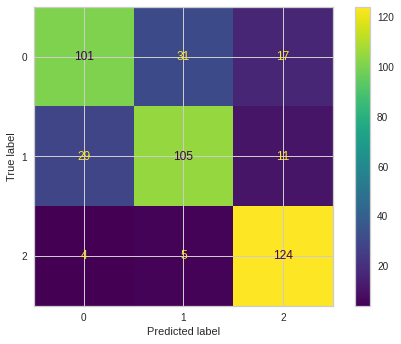

In [20]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam
from yellowbrick.datasets import load_credit
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#AUC_fig=ROCAUC(model_best,test_data_nolab, test_data[label],classes=["No acvtivity","Activity"])
#RocCurveDisplay.from_predictions(y_test, model_pred)
cm=confusion_matrix(y_test,model_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

In [21]:
y_probas=predictor.predict_proba(test_data_nolab)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/roo/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/home/roo/anaconda3/lib/python3.8/site-packages/scikitplot/metrics.py:284: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


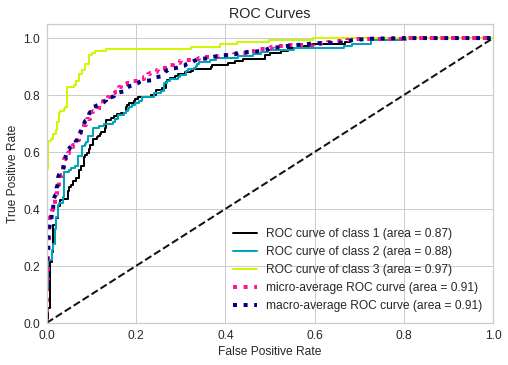

In [28]:
#AUC-figure1
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test,y_probas)

plt.savefig("fig2.pdf")
plt.show()

In [29]:
pd.set_option('max_row',100)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Computing feature importance via permutation shuffling for 94 features using 427 rows with 3 shuffle sets...
	1351.82s	= Expected runtime (450.61s per shuffle set)
	266.03s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Angle Subtended by the Hydrophobic Residues,0.095238,0.014873,0.004016,3,0.180463,0.010013
Tilt Angle,0.064012,0.018191,0.012939,3,0.168248,-0.040223
Small_Mole.,0.039813,0.004056,0.001721,3,0.063056,0.016569
Aliphatic_Mole.,0.035129,0.008113,0.008659,3,0.081615,-0.011358
Tiny_Mole.,0.028884,0.005408,0.005743,3,0.059875,-0.002107
Propensity to in vitro Aggregation,0.023419,0.010208,0.028944,3,0.081913,-0.035075
Net Charge,0.015613,0.002704,0.004926,3,0.031108,0.000117
Aromatic_Mole.,0.014052,0.007026,0.037090,3,0.054310,-0.026207
Acidic_Mole.,0.009368,0.006196,0.060059,3,0.044872,-0.026137
BLOSUM8,0.008587,0.001352,0.004082,3,0.016335,0.000839


In [30]:
importance.to_csv('importance.csv',sep=',',index=True,header=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
antidata_neg = TabularDataset('neg_dataset.csv')
y_pred_neg= predictor.predict(antidata_neg)
print("Predictions: \n", y_pred_neg)
print("GT: \n", y_pred_neg)
percent_neg=predictor.predict_proba(antidata_neg)
print(percent_neg)

Loaded data from: neg_dataset.csv | Columns = 94 / 94 | Rows = 489 -> 489


Predictions: 
 0      3
1      3
2      3
3      3
4      3
      ..
484    2
485    3
486    3
487    3
488    3
Name: Label, Length: 489, dtype: int64
GT: 
 0      3
1      3
2      3
3      3
4      3
      ..
484    2
485    3
486    3
487    3
488    3
Name: Label, Length: 489, dtype: int64
            1         2         3
0    0.183452  0.079862  0.736686
1    0.082831  0.070777  0.846392
2    0.167486  0.088631  0.743883
3    0.143386  0.188103  0.668511
4    0.124663  0.076115  0.799223
..        ...       ...       ...
484  0.313401  0.386646  0.299952
485  0.249809  0.224224  0.525967
486  0.120367  0.245340  0.634293
487  0.220584  0.227512  0.551904
488  0.167049  0.125349  0.707602

[489 rows x 3 columns]


In [32]:
antidata = TabularDataset('de_AMPs.csv')
y_pred= predictor.predict(antidata)
print("Predictions: \n", y_pred)
print("GT: \n", y_pred)
percent=predictor.predict_proba(antidata)
print(percent)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: de_AMPs.csv | Columns = 95 / 95 | Rows = 6 -> 6


Predictions: 
 0    1
1    1
2    1
3    1
4    1
5    1
Name: Label, dtype: int64
GT: 
 0    1
1    1
2    1
3    1
4    1
5    1
Name: Label, dtype: int64
          1         2         3
0  0.679415  0.245036  0.075549
1  0.511507  0.307058  0.181434
2  0.680693  0.242555  0.076752
3  0.616131  0.262436  0.121433
4  0.650843  0.272574  0.076583
5  0.753098  0.131869  0.115033


In [26]:
y_pred_neg.to_csv('pred_neg.csv',sep=',',index=True,header=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
y_pred.to_csv('antiperd.csv',sep=',',index=True,header=True)

In [35]:
percent.to_csv('percent.csv',sep=',',index=True,header=True)

In [23]:
data.to_csv('smo_2.csv')